In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# 1. MEMUAT DAN MEMPERSIAPKAN DATA

In [6]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Muat dataset dari file CSV
df = pd.read_csv('hasil_atr_btc.csv')

# Menghapus kolom yang tidak diperlukan
# df = df.drop(columns=['Unnamed: 0']) # This column does not exist

# Mengubah kolom 'date' menjadi tipe data datetime dan menjadikannya sebagai index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Memeriksa data yang hilang
print("Pemeriksaan nilai yang hilang:")
print(df.isnull().sum())
print("-" * 30)

Pemeriksaan nilai yang hilang:
Close          0
Open           0
Volume         0
Low            0
High           0
EMA200         0
MACD_Line      0
MACD_Line.1    0
Signal_Line    0
Histogram      0
RSI            0
SMA200         0
ATR            0
Type           0
Profit (%)     0
Label          0
dtype: int64
------------------------------


# 2. PREPROCESSING DATA

In [8]:
# Mendefinisikan fitur (X) dan target (y)
features = ['Open', 'High', 'Low', 'Volume', 'ATR']
target = 'Close'

X = df[features]
y = df[[target]] # Menggunakan kurung siku ganda agar tetap menjadi DataFrame

# Normalisasi data ke rentang [0, 1]
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print("-" * 30)

Jumlah data latih: 1846
Jumlah data uji: 462
------------------------------


# 3. MEMBANGUN MODEL JARINGAN SARAF

In [9]:
model = tf.keras.Sequential([
    # Input layer dengan bentuk sesuai jumlah fitur
    tf.keras.layers.Input(shape=(X_train.shape[1],)),

    # Hidden layer pertama
    tf.keras.layers.Dense(64, activation='relu'),

    # Hidden layer kedua
    tf.keras.layers.Dense(32, activation='relu'),

    # Output layer untuk prediksi regresi (1 neuron, tanpa aktivasi/linear)
    tf.keras.layers.Dense(1, activation='linear')
])

# Mengompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Menampilkan ringkasan arsitektur model
model.summary()
print("-" * 30)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

------------------------------


# 4. MELATIH MODEL


In [10]:
print("Memulai pelatihan model...")
# Melatih model dan menyimpan riwayat pelatihan
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1 # Menampilkan progress bar
)
print("Pelatihan model selesai.")
print("-" * 30)

Memulai pelatihan model...
Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0082 - val_loss: 2.8249e-04
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5909e-05 - val_loss: 8.7059e-05
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5474e-06 - val_loss: 3.6837e-05
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6182e-06 - val_loss: 2.5538e-05
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7868e-06 - val_loss: 1.8009e-05
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5494e-06 - val_loss: 1.9878e-05
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9061e-06 - val_loss: 1.6707e-05
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9328e-06 - val_loss: 1.5778e-05
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5909e-06 - val_loss: 2.4626e-05
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7640e-06 - val_loss: 2.3677e-05
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

# 5. EVALUASI MODEL


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Membuat prediksi pada data uji
y_pred_scaled = model.predict(X_test)

# Mengembalikan nilai prediksi dan nilai aktual ke skala aslinya
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test_actual.flatten(), y_pred_actual.flatten())
mse = mean_squared_error(y_test_actual.flatten(), y_pred_actual.flatten())
rmse = np.sqrt(mse)

print("Hasil Evaluasi Model pada Data Uji:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print("-" * 30)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Hasil Evaluasi Model pada Data Uji:
Mean Absolute Error (MAE): $268.98
Root Mean Squared Error (RMSE): $371.54
------------------------------


# 6. VISUALISASI HASIL


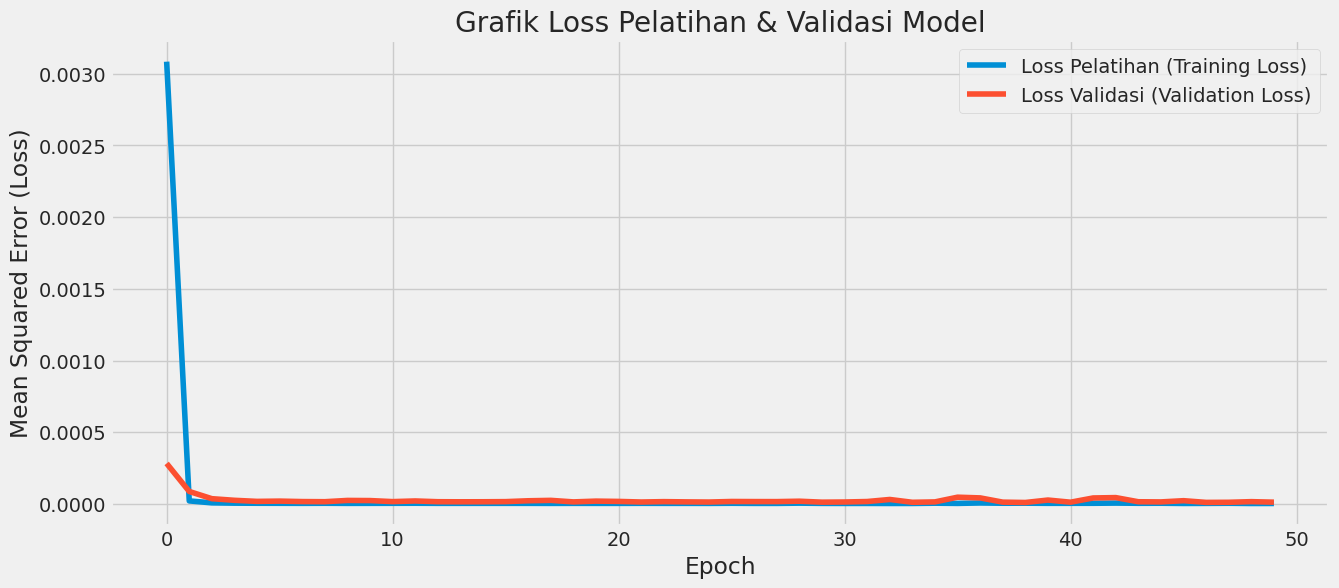

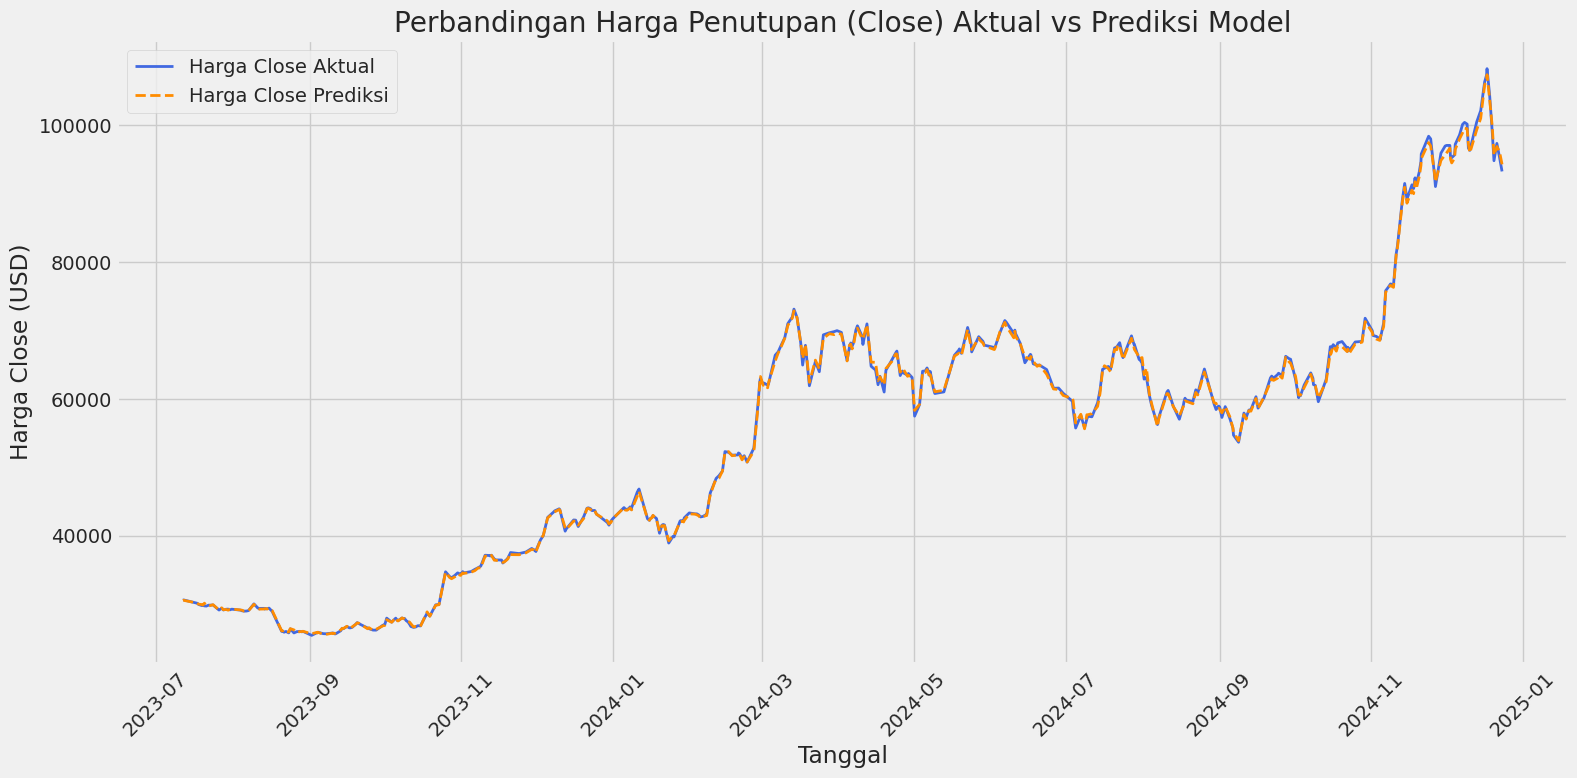

In [14]:
# Visualisasi 1: Grafik Loss Pelatihan vs Validasi
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Loss Pelatihan (Training Loss)')
plt.plot(history.history['val_loss'], label='Loss Validasi (Validation Loss)')
plt.title('Grafik Loss Pelatihan & Validasi Model')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.show()

# Visualisasi 2: Grafik Perbandingan Harga Aktual vs Prediksi
# Membuat DataFrame untuk memudahkan plotting
results_df = pd.DataFrame({
    'Tanggal': df.index[-len(y_test_actual):],
    'Harga Aktual': y_test_actual.flatten(),
    'Harga Prediksi': y_pred_actual.flatten()
})
results_df.set_index('Tanggal', inplace=True)


plt.figure(figsize=(16, 8))
plt.plot(results_df['Harga Aktual'], label='Harga Close Aktual', color='royalblue', linewidth=2)
plt.plot(results_df['Harga Prediksi'], label='Harga Close Prediksi', color='darkorange', linestyle='--', linewidth=2)
plt.title('Perbandingan Harga Penutupan (Close) Aktual vs Prediksi Model')
plt.xlabel('Tanggal')
plt.ylabel('Harga Close (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
